In [12]:
library(dplyr)
library(ggplot2)
report_theme <- theme(
  panel.background = element_rect(fill = "white"),
  axis.text.x = element_text(size = 14, color = "#143264", angle = -30, vjust = 0.6),
  axis.text.y = element_text(size = 14, color = "#143264"),
  axis.title = element_text(size = 20, color = "#143264"),
  title = element_text(color = "#143264", size = 20),
  legend.title = element_text(color = "#143264", size = 18),
  legend.text = element_text(color = "#143264", size = 18),
  strip.text.x = element_text(size = 14),
  strip.text.y = element_text(size = 14)
) + theme_bw()

# Unique sample selection probabilities

In [2]:
res <- lapply(c("RANDU", "MT", "SD", "SHA256"), function(prngname){
    read.csv(paste0("../../prngs-and-permutations/Code/frequencySimulations/rawdata/US_", prngname,"_PIKK.csv"), header = FALSE)
})
res <- do.call(rbind, res)
colnames(res) <- c("Pop.size", "Sample.size", "seed", "reps", "Algorithm", "PRNG",
                  "Chisq.Stat", "Chisq.DF", "Chisq.P.value",
                  "Range.Stat", "Range.P.value",
                  "Max.Selection.Prob.Ratio")

res2 <- lapply(c("RANDU", "MT", "SD", "SHA256"), function(prngname){
    read.csv(paste0("../../prngs-and-permutations/Code/frequencySimulations/rawdata/US_", prngname,"_sbi.csv"), header = FALSE)
})
res2 <- do.call(rbind, res2)
colnames(res2) <- c("Pop.size", "Sample.size", "seed", "reps", "Algorithm", "PRNG",
                  "Chisq.Stat", "Chisq.DF", "Chisq.P.value",
                  "Range.Stat", "Range.P.value",
                  "Max.Selection.Prob.Ratio")
res <- rbind(res, res2)

head(res)
dim(res)
str(res)

Pop.size,Sample.size,seed,reps,Algorithm,PRNG,Chisq.Stat,Chisq.DF,Chisq.P.value,Range.Stat,Range.P.value,Max.Selection.Prob.Ratio
13,4,100,100000,PIKK,RANDU,702.8022,714,0.6103466,86,0.03939043,1
13,4,100,200000,PIKK,RANDU,678.9356,714,0.8227319,100,0.71152158,1
13,4,100,300000,PIKK,RANDU,686.9485,714,0.7603429,109,0.98773075,1
13,4,100,400000,PIKK,RANDU,753.8964,714,0.1458761,144,0.62533743,1
13,4,100,500000,PIKK,RANDU,741.4526,714,0.2311838,151,0.88355571,1
13,4,100,600000,PIKK,RANDU,757.9888,714,0.1233220,181,0.49499822,1


[1] 10600    12

'data.frame':	10600 obs. of  12 variables:
 $ Pop.size                : int  13 13 13 13 13 13 13 13 13 13 ...
 $ Sample.size             : int  4 4 4 4 4 4 4 4 4 4 ...
 $ seed                    : int  100 100 100 100 100 100 100 100 100 100 ...
 $ reps                    : int  100000 200000 300000 400000 500000 600000 700000 800000 900000 1000000 ...
 $ Algorithm               : Factor w/ 2 levels "PIKK","sample_by_index": 1 1 1 1 1 1 1 1 1 1 ...
 $ PRNG                    : Factor w/ 4 levels "RANDU","MT","SD",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Chisq.Stat              : num  703 679 687 754 741 ...
 $ Chisq.DF                : int  714 714 714 714 714 714 714 714 714 714 ...
 $ Chisq.P.value           : num  0.61 0.823 0.76 0.146 0.231 ...
 $ Range.Stat              : int  86 100 109 144 151 181 201 209 231 235 ...
 $ Range.P.value           : num  0.0394 0.7115 0.9877 0.6253 0.8836 ...
 $ Max.Selection.Prob.Ratio: num  1 1 1 1 1 1 1 1 1 1 ...


# PIKK n = 13 results

Warning message:
“Removed 120 rows containing missing values (geom_smooth).”

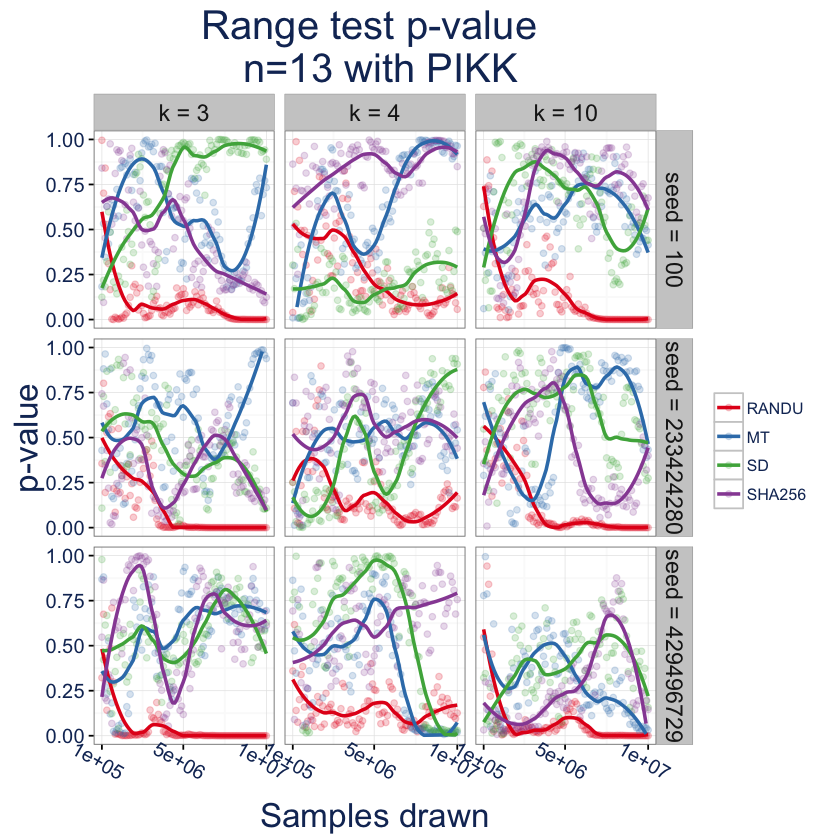

In [3]:
n13_range_pikk = res %>% 
    filter(Algorithm == "PIKK") %>%
    filter(Pop.size == 13) %>%
    mutate(seed = paste0("seed = ", seed)) %>%
    mutate(Sample.size = paste0("k = ", Sample.size)) %>%
    mutate(Sample.size = factor(Sample.size, levels = c("k = 3", "k = 4", "k = 10"))) %>%
    ggplot(aes(x = reps, y = Range.P.value, color = factor(PRNG))) + 
    geom_point(alpha = 0.2) + geom_smooth(se = FALSE, span = 0.5) +
    facet_grid(seed~Sample.size) +
    ylim(0, 1) + 
    ggtitle("Range test p-value \n n=13 with PIKK") +
    report_theme +
    xlab("Samples drawn") +
    ylab("p-value") +
    labs(color = "") +
    scale_color_brewer(palette = "Set1") +
    scale_x_continuous(breaks = c(1e5, 5*1e6, 1e7))
n13_range_pikk


pdf("../fig/prng-comparison-range-n13-pikk.pdf", width = 12)
n13_range_pikk
dev.off()

Warning message:
“Removed 376 rows containing missing values (geom_smooth).”

Warning message:
“Removed 376 rows containing missing values (geom_smooth).”

pdf 
  2

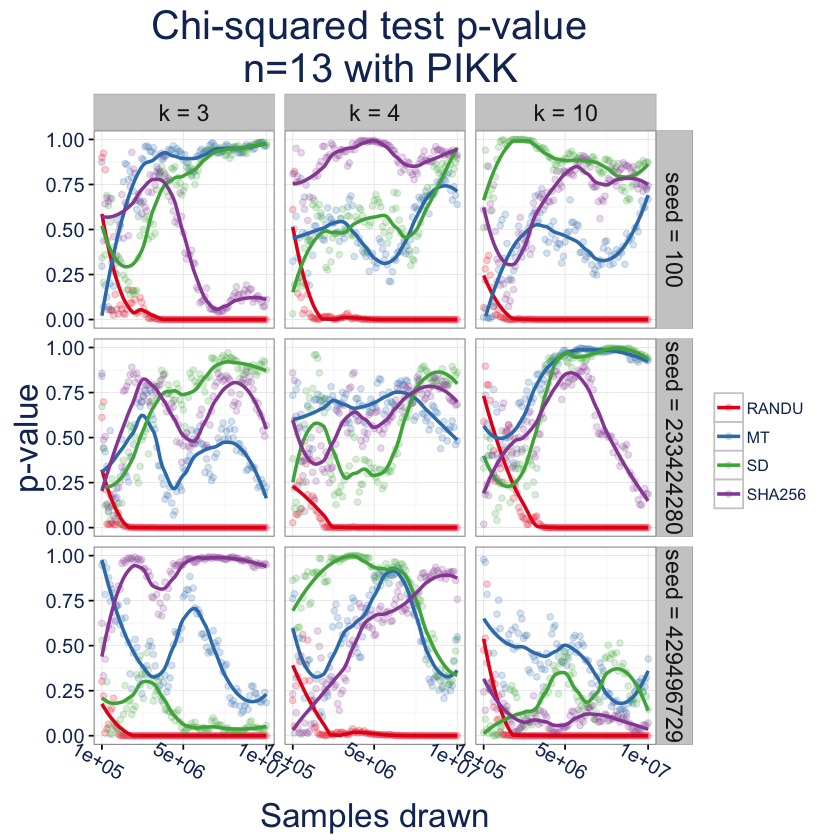

In [4]:
n13_chisq_pikk = res %>% 
    filter(Algorithm == "PIKK") %>%
    filter(Pop.size == 13) %>%
    mutate(seed = paste0("seed = ", seed)) %>%
    mutate(Sample.size = paste0("k = ", Sample.size)) %>%
    mutate(Sample.size = factor(Sample.size, levels = c("k = 3", "k = 4", "k = 10"))) %>%
    ggplot(aes(x = reps, y = Chisq.P.value, color = factor(PRNG))) + 
    geom_point(alpha = 0.2) + geom_smooth(se = FALSE, span = 0.5) +
    facet_grid(seed~Sample.size) +
    ylim(0, 1) + 
    ggtitle("Chi-squared test p-value \n n=13 with PIKK") +
    report_theme +
    xlab("Samples drawn") +
    ylab("p-value") +
    labs(color = "") +
    scale_color_brewer(palette = "Set1") +
    scale_x_continuous(breaks = c(1e5, 5*1e6, 1e7))
n13_chisq_pikk


pdf("../fig/prng-comparison-chisq-n13-pikk.pdf", width = 12)
n13_chisq_pikk
dev.off()

# sample_by_index results

Warning message:
“Removed 140 rows containing missing values (geom_smooth).”

Warning message:
“Removed 140 rows containing missing values (geom_smooth).”

pdf 
  2

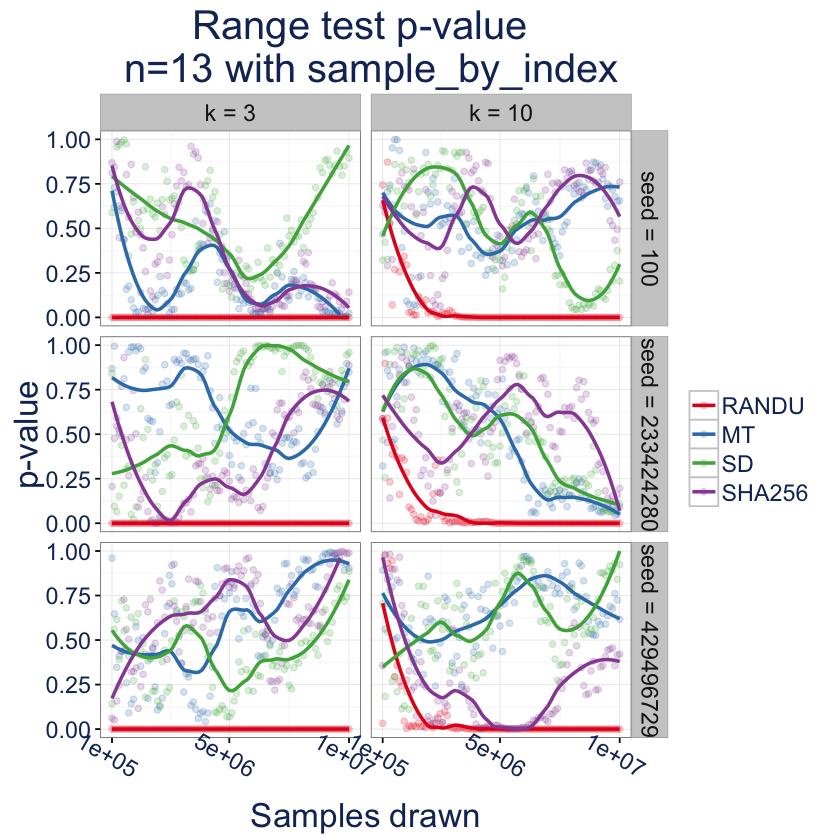

In [15]:
n13_range_sbi = res %>% 
    filter(Algorithm == "sample_by_index") %>%
    filter(Pop.size == 13) %>%
    filter(Sample.size != 4) %>%
    mutate(seed = paste0("seed = ", seed)) %>%
    mutate(Sample.size = paste0("k = ", Sample.size)) %>%
    mutate(Sample.size = factor(Sample.size, levels = c("k = 3", "k = 4", "k = 10"))) %>%
    ggplot(aes(x = reps, y = Range.P.value, color = factor(PRNG))) + 
    geom_point(alpha = 0.2) + geom_smooth(se = FALSE, span = 0.5) +
    facet_grid(seed~Sample.size) +
    ylim(0, 1) + 
    labs(color = "") +
    ggtitle("Range test p-value \n n=13 with sample_by_index") +
    xlab("Samples drawn") +
    ylab("p-value") +
    scale_color_brewer(palette = "Set1") +
    scale_x_continuous(breaks = c(1e5, 5*1e6, 1e7)) +
    report_theme +
    theme(legend.text = element_text(color = "#143264", size = 14))
n13_range_sbi

pdf("../fig/prng-comparison-range-n13-sbi.pdf", width = 12)
n13_range_sbi
dev.off()

Warning message:
“Removed 334 rows containing missing values (geom_smooth).”

Warning message:
“Removed 334 rows containing missing values (geom_smooth).”

pdf 
  2

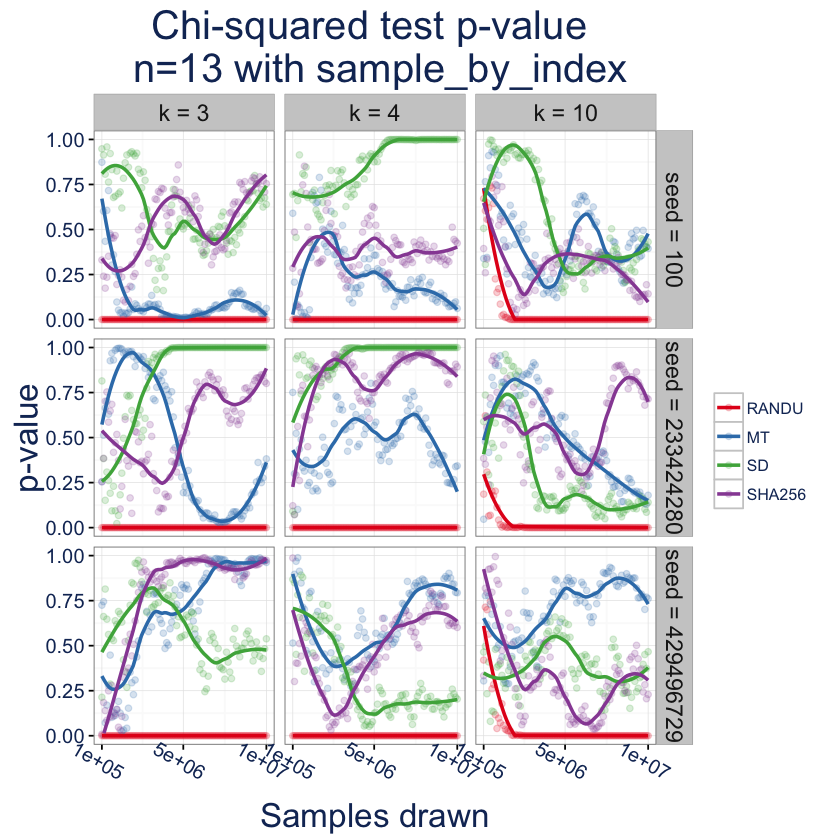

In [6]:
n13_chisq_sbi = res %>% 
    filter(Algorithm == "sample_by_index") %>%
    filter(Pop.size == 13) %>%
    mutate(seed = paste0("seed = ", seed)) %>%
    mutate(Sample.size = paste0("k = ", Sample.size)) %>%
    mutate(Sample.size = factor(Sample.size, levels = c("k = 3", "k = 4", "k = 10"))) %>%
    ggplot(aes(x = reps, y = Chisq.P.value, color = factor(PRNG))) + 
    geom_point(alpha = 0.2) + geom_smooth(se = FALSE, span = 0.5) +
    facet_grid(seed~Sample.size) +
    ylim(0, 1) + 
    ggtitle("Chi-squared test p-value \n n=13 with sample_by_index") +
    report_theme +
    xlab("Samples drawn") +
    ylab("p-value") +
    labs(color = "") +
    scale_color_brewer(palette = "Set1") +
    scale_x_continuous(breaks = c(1e5, 5*1e6, 1e7))
n13_chisq_sbi

pdf("../fig/prng-comparison-chisq-n13-sbi.pdf", width = 12)
n13_chisq_sbi
dev.off()

# Comparing sampling methods

Warning message:
“Removed 2 rows containing missing values (geom_smooth).”

Warning message:
“Removed 2 rows containing missing values (geom_smooth).”

pdf 
  2

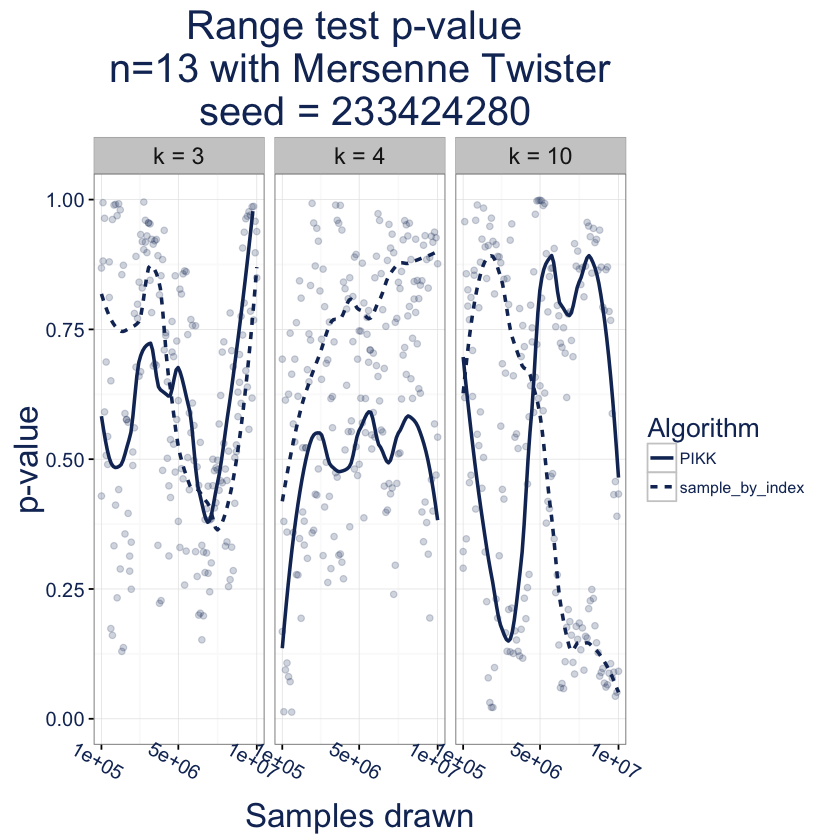

In [7]:
n13_sa = res %>% 
#    filter(Algorithm == "sample_by_index") %>%
    filter(Pop.size == 13) %>%
    filter(PRNG == "MT") %>%
    filter(seed == 233424280) %>%
    mutate(seed = paste0("seed = ", seed)) %>%
    mutate(Sample.size = paste0("k = ", Sample.size)) %>%
    mutate(Sample.size = factor(Sample.size, levels = c("k = 3", "k = 4", "k = 10"))) %>%
    ggplot(aes(x = reps, y = Range.P.value, linetype = Algorithm), color = "#143264") + 
    geom_point(alpha = 0.2, color = "#143264") + geom_smooth(se = FALSE, span = 0.5, color = "#143264") +
    facet_grid(~Sample.size) +
    ylim(0, 1) + 
    ggtitle("Range test p-value \n n=13 with Mersenne Twister \n seed = 233424280") +
    report_theme +
    xlab("Samples drawn") +
    ylab("p-value") +
    labs(color = "") +
    scale_color_manual(values="#143264") +
    scale_x_continuous(breaks = c(1e5, 5*1e6, 1e7))
n13_sa

pdf("../fig/prng-sa-lineplot.pdf", width = 12)
n13_sa
dev.off()

# Comparing seeds

Warning message:
“Removed 12 rows containing missing values (geom_smooth).”

Warning message:
“Removed 12 rows containing missing values (geom_smooth).”

pdf 
  2

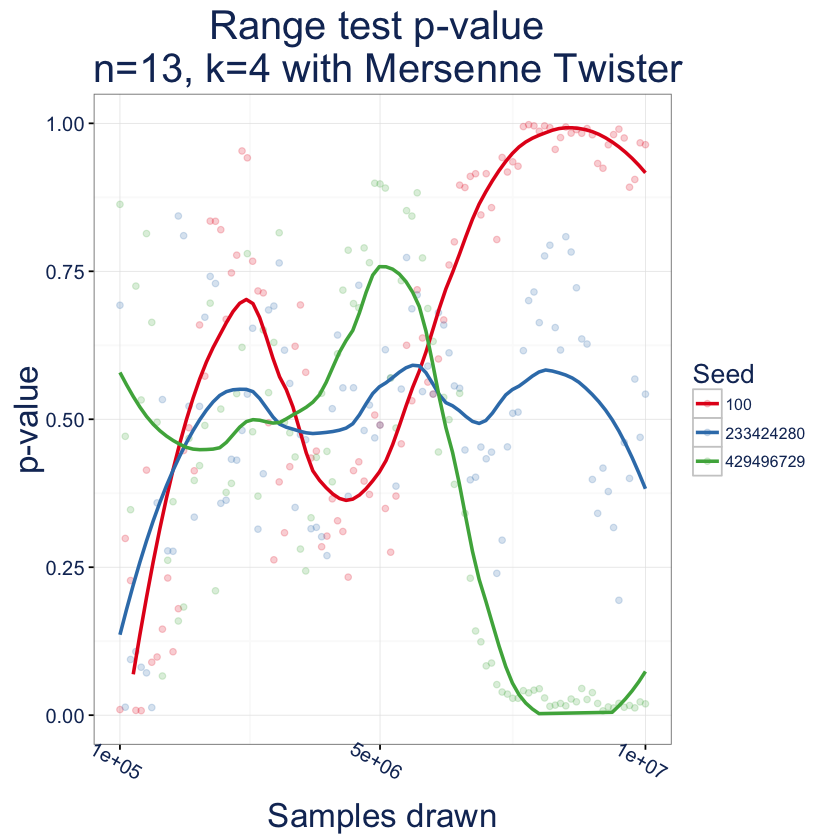

In [29]:
n13_seeds = res %>% 
    filter(Algorithm == "PIKK") %>%
    filter(Pop.size == 13) %>%
    filter(PRNG == "MT") %>%
    filter(Sample.size == 4) %>%
#    mutate(seed = paste0("seed = ", seed)) %>%
    ggplot(aes(x = reps, y = Range.P.value, color = factor(seed))) + 
    geom_point(alpha = 0.2) + geom_smooth(se = FALSE, span = 0.5) +
#    facet_grid(~PRNG) +
    ylim(0, 1) +
    ggtitle("Range test p-value \n n=13, k=4 with Mersenne Twister") +
    report_theme +
    xlab("Samples drawn") +
    ylab("p-value") +
    labs(color = "Seed") +
    scale_color_brewer(palette = "Set1") +
    scale_x_continuous(breaks = c(1e5, 5*1e6, 1e7))
n13_seeds

pdf("../fig/prng-seeds-lineplot.pdf", width = 12)
n13_seeds
dev.off()

# Look at statistic instead of p-value

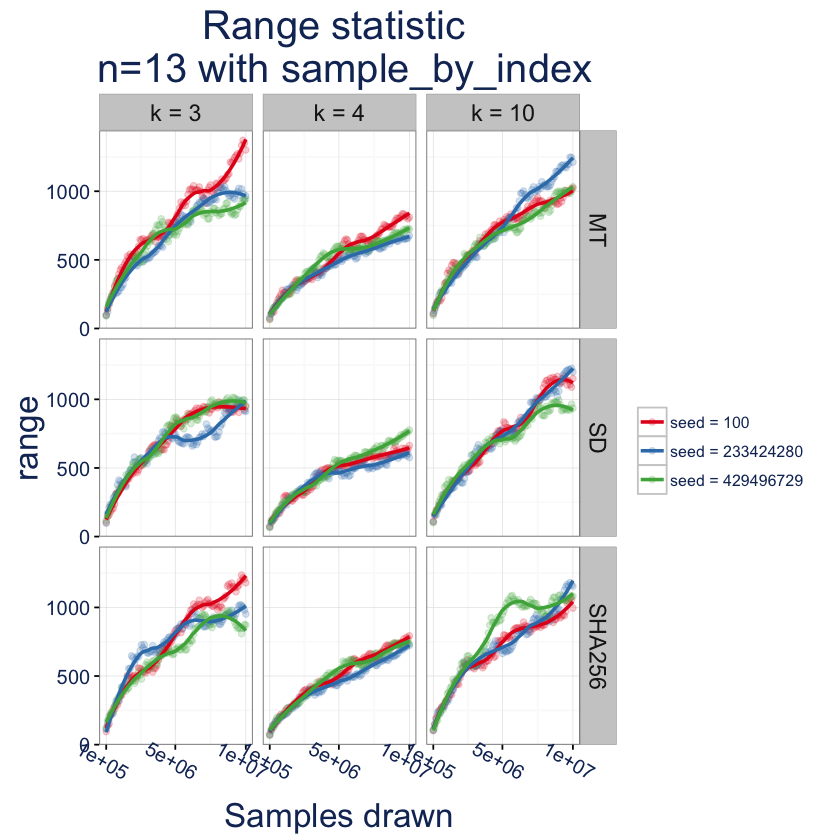

In [8]:
n13_rangestat_sbi = res %>% 
    filter(Algorithm == "sample_by_index") %>%
    filter(Pop.size == 13) %>%
    filter(PRNG != "RANDU") %>%
    mutate(seed = paste0("seed = ", seed)) %>%
    mutate(Sample.size = paste0("k = ", Sample.size)) %>%
    mutate(Sample.size = factor(Sample.size, levels = c("k = 3", "k = 4", "k = 10"))) %>%
    ggplot(aes(x = reps, y = Range.Stat, color = factor(seed))) + 
    geom_point(alpha = 0.2) + geom_smooth(se = FALSE, span = 0.5) +
    facet_grid(PRNG~Sample.size) +
    ggtitle("Range statistic \n n=13 with sample_by_index") +
    report_theme +
    xlab("Samples drawn") +
    ylab("range") +
    labs(color = "") +
    scale_color_brewer(palette = "Set1") +
    scale_x_continuous(breaks = c(1e5, 5*1e6, 1e7))
n13_rangestat_sbi

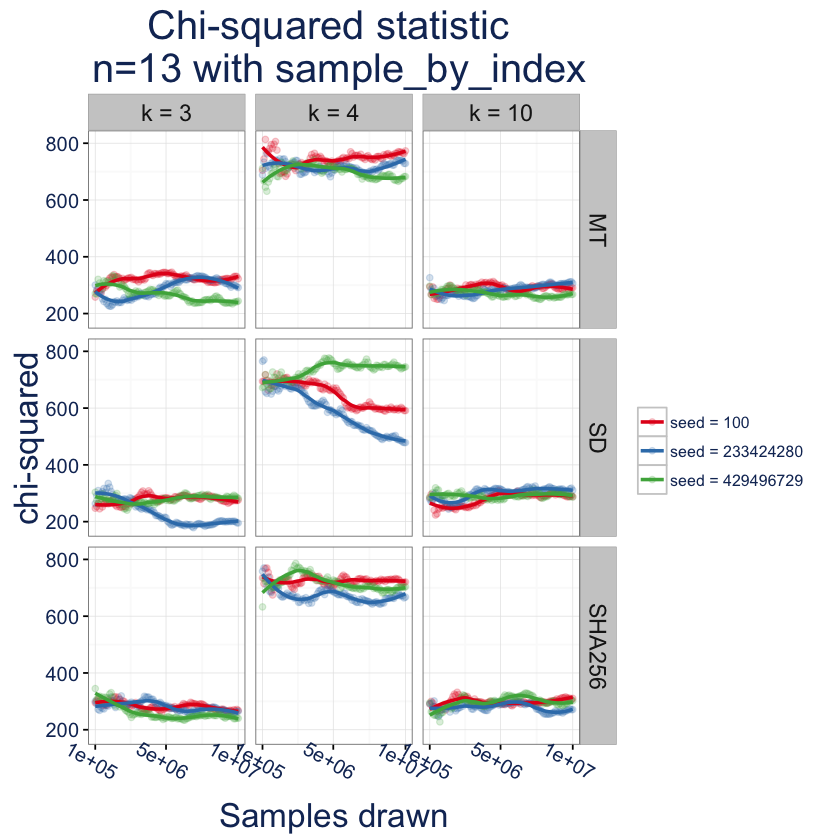

In [9]:
n13_xstat_sbi = res %>% 
    filter(Algorithm == "sample_by_index") %>%
    filter(Pop.size == 13) %>%
    filter(PRNG != "RANDU") %>%
    mutate(seed = paste0("seed = ", seed)) %>%
    mutate(Sample.size = paste0("k = ", Sample.size)) %>%
    mutate(Sample.size = factor(Sample.size, levels = c("k = 3", "k = 4", "k = 10"))) %>%
    ggplot(aes(x = reps, y = Chisq.Stat, color = factor(seed))) + 
    geom_point(alpha = 0.2) + geom_smooth(se = FALSE, span = 0.5) +
    facet_grid(PRNG~Sample.size) +
    ggtitle("Chi-squared statistic \n n=13 with sample_by_index") +
    report_theme +
    xlab("Samples drawn") +
    ylab("chi-squared") +
    labs(color = "") +
    scale_color_brewer(palette = "Set1") +
    scale_x_continuous(breaks = c(1e5, 5*1e6, 1e7))
n13_xstat_sbi